# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [3]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')


## Task 1

Run the code below before you start working on your homework:


In [4]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [5]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [6]:
task2_data = pd.read_csv('../data/hw3-task2-data.csv')
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:1],task2_data.c,test_size=0.25)

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [8]:
model = KMeans(n_clusters=2,random_state=0).fit(Xtrain)
predictions = model.predict(Xtest)

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [9]:
cm = confusion_matrix(Ytest,predictions)
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(Ytest,predictions)
accuracy

0.542016806722689

As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

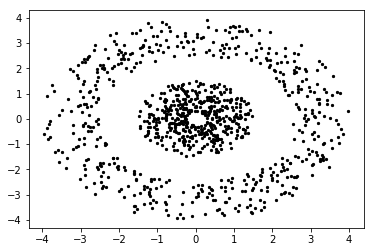

In [74]:
import numpy as np
from matplotlib import pyplot as plt
f1 = task2_data['x'].values
f2 = task2_data['y'].values
X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=5 )


In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

At k-means algorithm, cluster centers are placed randomly then each data point is assigned by deciding which centeroid is closer. In this way data points are clustered based on feature similarity. As seen in the above plot, we cannot determine which data element is assigned to which cluster because two separate centeroids cannot be determined.

## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [11]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(Xtrain,Ytrain)
predictions = model.predict(Xtest)

Now, construct the confusion matrix, and calculate your accuracy.

In [12]:
cm = confusion_matrix(Ytest,predictions) 
accuracy = accuracy_score(Ytest,predictions)
accuracy

0.819327731092437

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

We obtained much better accuracy because k-nn model is appropirate for this data set. An k-nn model algorithm, a data point is classified by a majority vote of its neighbors, with the data point being assigned to the class most common among its k nearest neighbors. When we look at the our data set plot, it is logical to classify the data by looking at its neighbors so we get much better accuracy than k-means algorithm model by using k-nn model.

## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [13]:
data = pd.read_excel("../data/BreastTissue.xlsx")
xs = data.iloc[:,1:]
ys = data.iloc[:,0]
data.head(10)

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,car,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,car,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,car,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,car,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,car,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [14]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25)

In [116]:
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted, labels=list(set(data.Class))) 
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[3 2 0 1 0 0]
 [1 0 1 2 0 0]
 [0 0 3 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 1 0 1 3]]
0.6666666666666666


Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [16]:
scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.transform(xs) 

Now, repeat mdoel construction, training, testing and accuracy calculation

In [17]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25)
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted,labels=list(set(data.Class)))
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[3 2 0 0 0 0]
 [2 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 1 0 8 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 2]]
0.7407407407407407


Why did we get better results? Explain below:

### Your explanation goes below
Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. Datasets generally contains features highly varying in magnitudes, units and range but most of the machine learning algorithms use Eucledian distance between two data points in their computations. These algorithms only take in the magnitude of features neglecting the units so results would vary greatly between different units. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. We supressed this effect by normalizing the feature columns xs.

## Task 5

Now, construct a k-means model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [23]:
list(set(data.Class))

['fad', 'mas', 'gla', 'car', 'adi', 'con']

In [110]:
data = pd.read_excel("../data/BreastTissue.xlsx")
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25)
model = KMeans(n_clusters=6, random_state=0).fit(Xtrain)

predicted = model.predict(Xtest)
labels = {'fad':3, 'mas':0, 'gla':4, 'car':1, 'adi':2, 'con':5 }
real = Ytest.map(lambda x: labels[x])
cm=confusion_matrix(real,predicted)
print(cm)
print(accuracy_score(real, predicted))


[[6 0 0 0 0 0]
 [3 0 0 2 2 0]
 [1 0 1 2 0 0]
 [4 0 0 0 0 0]
 [5 0 0 0 0 0]
 [1 0 0 0 0 0]]
0.25925925925925924


I tried to optimize the accuracy by doing various label numbering, and it was the best value for accuracy I had.

In [114]:
data = pd.read_excel("../data/BreastTissue.xlsx")
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.transform(xs) 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25)
model = KMeans(n_clusters=6, random_state=0).fit(Xtrain)

predicted = model.predict(Xtest)
labels = {'fad':3, 'mas':0, 'gla':4, 'car':1, 'adi':2, 'con':5 }
real = Ytest.map(lambda x: labels[x])
cm=confusion_matrix(real,predicted)
print(cm)
print(accuracy_score(real, predicted))


[[3 0 0 1 0 0]
 [0 0 0 5 0 0]
 [0 1 3 0 0 0]
 [4 0 0 2 0 0]
 [2 0 0 1 0 0]
 [2 1 0 0 0 2]]
0.37037037037037035


After using feature scalling, the accuracy value is much better but the comparison is not stable. I've get worse results when running more than one.